# Những thư viện cần thiết

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Data + Visualize

In [5]:
df = pd.read_csv('E:/Capstone_AIFSHOP/synthetic_dataset_80.csv')

In [6]:
df

,height,weight,age,gender,size
0,164,58,25,female,M
1,173,78,33,male,XXL
2,171,65,22,male,L
3,172,63,44,male,L
4,150,45,22,male,S
...,...,...,...,...,...
75,170,64,46,female,L
76,176,77,20,female,XL
77,153,42,45,female,XS
78,164,58,21,male,M


In [7]:
# Tính BMI
df['BMI'] = df['weight'] / ((df['height'] / 100) ** 2)

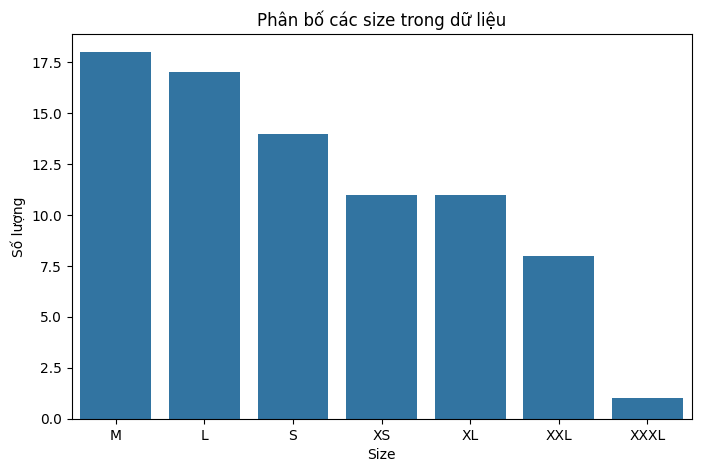

In [8]:
# ===== 1️⃣ Phân bố các size =====
plt.figure(figsize=(8,5))
sns.countplot(x='size', data=df, order=df['size'].value_counts().index)
plt.title("Phân bố các size trong dữ liệu")
plt.ylabel("Số lượng")
plt.xlabel("Size")
plt.show()

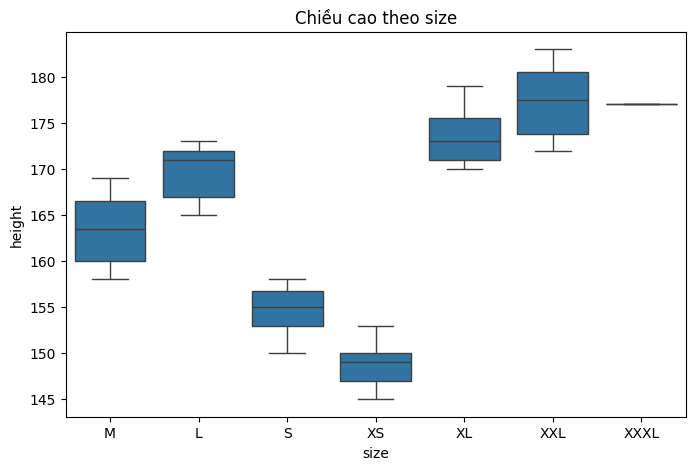

In [9]:
# ===== 2️⃣ Boxplot chiều cao theo size =====
plt.figure(figsize=(8,5))
sns.boxplot(x='size', y='height', data=df, order=df['size'].value_counts().index)
plt.title("Chiều cao theo size")
plt.show()

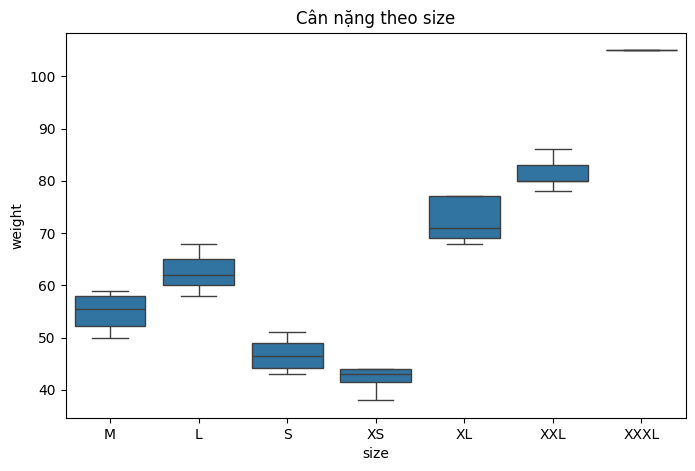

In [10]:
# ===== 3️⃣ Boxplot cân nặng theo size =====
plt.figure(figsize=(8,5))
sns.boxplot(x='size', y='weight', data=df, order=df['size'].value_counts().index)
plt.title("Cân nặng theo size")
plt.show()

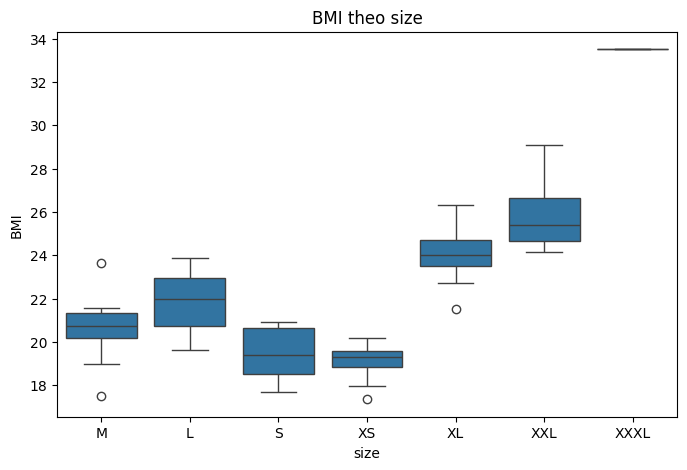

In [11]:
# ===== 4️⃣ Boxplot BMI theo size =====
plt.figure(figsize=(8,5))
sns.boxplot(x='size', y='BMI', data=df, order=df['size'].value_counts().index)
plt.title("BMI theo size")
plt.show()

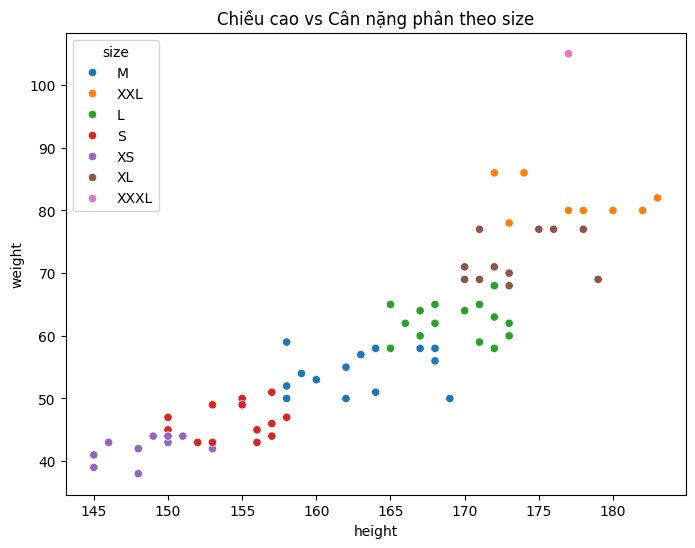

In [12]:
# ===== 5️⃣ Scatterplot chiều cao vs cân nặng =====
plt.figure(figsize=(8,6))
sns.scatterplot(x='height', y='weight', hue='size', data=df)
plt.title("Chiều cao vs Cân nặng phân theo size")
plt.show()

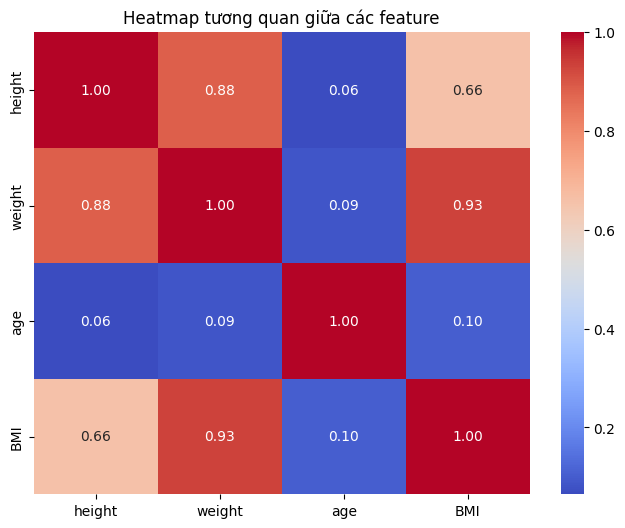

In [13]:
# ===== 6️⃣ Heatmap tương quan các feature =====
plt.figure(figsize=(8,6))
corr = df[['height', 'weight', 'age', 'BMI']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap tương quan giữa các feature")
plt.show()

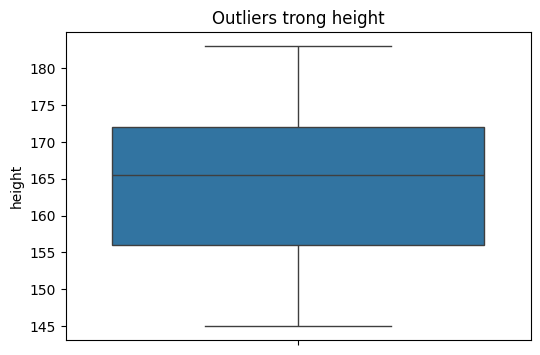

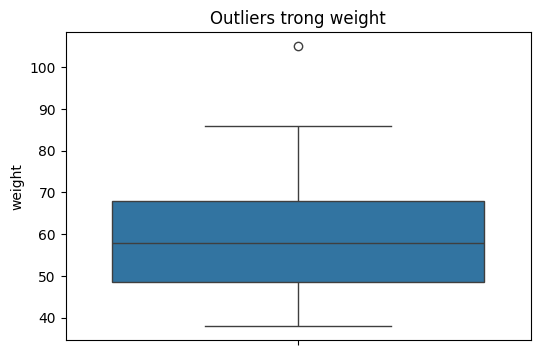

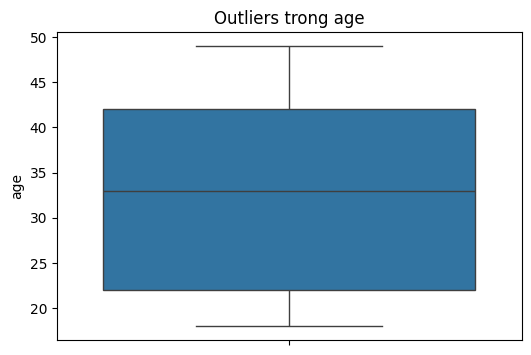

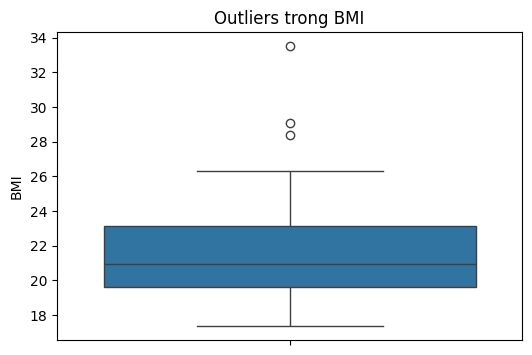

In [14]:
# ===== 7️⃣ Kiểm tra Outliers bằng Boxplot =====

# Hàm vẽ boxplot cho từng cột số để phát hiện outlier
def plot_box(column):
    plt.figure(figsize=(6,4))
    sns.boxplot(y=df[column])
    plt.title(f"Outliers trong {column}")
    plt.show()

for col in ['height', 'weight', 'age', 'BMI']:
    plot_box(col)

# Compare model


==== Random Forest ====
Accuracy: 0.81
F1 macro: 0.81

==== KNN (k=5) ====
Accuracy: 0.75
F1 macro: 0.72


c:\Users\chuon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\chuon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



==== Logistic Regression ====
Accuracy: 0.56
F1 macro: 0.46

==== CatBoost ====
Accuracy: 0.88
F1 macro: 0.88


c:\Users\chuon\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [11:27:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



==== XGBoost ====
Accuracy: 0.88
F1 macro: 0.88
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000730 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 77
[LightGBM] [Info] Number of data points in the train set: 64, number of used features: 5
[LightGBM] [Info] Start training from score -1.519826
[LightGBM] [Info] Start training from score -1.450833
[LightGBM] [Info] Start training from score -1.760988
[LightGBM] [Info] Start training from score -2.212973
[LightGBM] [Info] Start training from score -1.961659
[LightGBM] [Info] Start training from score -2.212973
[LightGBM] [Info] Start training from score -4.158883
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

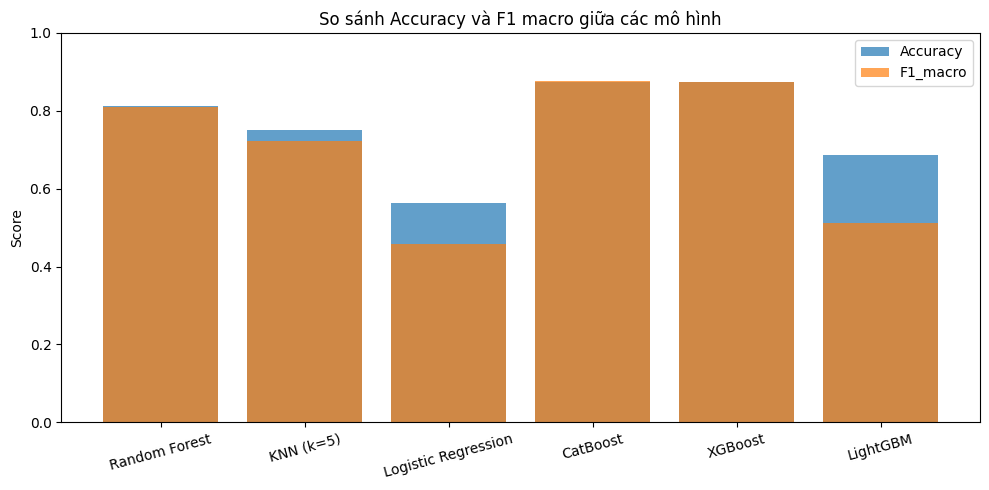

In [16]:
# # Load dữ liệu
# df = pd.read_csv("synthetic_dataset_80.csv")

# # Tính thêm BMI
# df['BMI'] = df['weight'] / ((df['height'] / 100) ** 2)

# Encode nhãn size
le = LabelEncoder()
df['size_encoded'] = le.fit_transform(df['size'])

# Encode gender
df['gender'] = df['gender'].map({'male': 1, 'female': 0})

# Tập features
X = df[['height', 'weight', 'age', 'gender', 'BMI']]
y = df['size_encoded']

# Chia train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo các mô hình
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'KNN (k=5)': KNeighborsClassifier(n_neighbors=5),
    'Logistic Regression': LogisticRegression(max_iter=1000, multi_class='multinomial'),
    'CatBoost': CatBoostClassifier(iterations=300, depth=4, learning_rate=0.05, verbose=0, random_state=42),
    'XGBoost': XGBClassifier(n_estimators=300, learning_rate=0.05, max_depth=4, use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    'LightGBM': LGBMClassifier(n_estimators=300, learning_rate=0.05, max_depth=4, random_state=42)
}

results = {"Model": [], "Accuracy": [], "F1_macro": []}

# Huấn luyện và đánh giá từng mô hình
for name, model in models.items():
    if name == 'CatBoost':
        model.fit(X_train, y_train, cat_features=[3])
    else:
        model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    results["Model"].append(name)
    results["Accuracy"].append(acc)
    results["F1_macro"].append(f1)
    print(f"\n==== {name} ====")
    print(f"Accuracy: {acc:.2f}")
    print(f"F1 macro: {f1:.2f}")

# Vẽ biểu đồ
results_df = pd.DataFrame(results)

plt.figure(figsize=(10, 5))
plt.bar(results_df["Model"], results_df["Accuracy"], label="Accuracy", alpha=0.7)
plt.bar(results_df["Model"], results_df["F1_macro"], label="F1_macro", alpha=0.7)
plt.ylabel("Score")
plt.ylim(0, 1)
plt.title("So sánh Accuracy và F1 macro giữa các mô hình")
plt.xticks(rotation=15)
plt.legend()
plt.tight_layout()
plt.savefig("model_comparison.png")
plt.show()

# Model CatBoost

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, f1_score
import joblib
from catboost import CatBoostClassifier

# 1️⃣ Load dữ liệu
df = pd.read_csv("E:/Capstone_AIFSHOP/synthetic_dataset_80.csv")

# 2️⃣ Feature engineering: Tính BMI
df['BMI'] = df['weight'] / ((df['height'] / 100) ** 2)

# 3️⃣ Phát hiện và lọc outlier bằng quy tắc IQR
def remove_outliers(df, columns):
    cleaned_df = df.copy()
    for col in columns:
        Q1 = cleaned_df[col].quantile(0.25)
        Q3 = cleaned_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        cleaned_df = cleaned_df[(cleaned_df[col] >= lower_bound) & (cleaned_df[col] <= upper_bound)]
    return cleaned_df

df_cleaned = remove_outliers(df, ['height', 'weight', 'age', 'BMI'])

# 4️⃣ Encode label size
le = LabelEncoder()
df_cleaned['size_encoded'] = le.fit_transform(df_cleaned['size'])

# 5️⃣ Encode gender (vẫn giữ dạng categorical string cho CatBoost)
df_cleaned['gender'] = df_cleaned['gender'].astype(str)

# 6️⃣ Chia train/test
X = df_cleaned[['height', 'weight', 'age', 'gender', 'BMI']]
y = df_cleaned['size_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7️⃣ Huấn luyện CatBoost (chỉ định cột categorical)
model = CatBoostClassifier(
    iterations=300, depth=4, learning_rate=0.05, random_state=42, verbose=0
)
model.fit(X_train, y_train, cat_features=['gender'])

# 8️⃣ Đánh giá
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
print("✅ CatBoost training completed")
print(f"Accuracy: {acc:.2f}")
print(f"F1 macro: {f1:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred, labels=np.unique(y_test), target_names=le.inverse_transform(np.unique(y_test))))

# 9️⃣ Lưu model và encoder
model.save_model("catboost_pipeline_model_final.cbm")
joblib.dump(le, "catboost_pipeline_label_encoder_final.pkl")
df_cleaned.to_csv("cleaned_dataset_catboost_final.csv", index=False)
print("✅ CatBoost model và dữ liệu sạch đã được lưu.")


✅ CatBoost training completed
Accuracy: 0.88
F1 macro: 0.86
Classification Report:
              precision    recall  f1-score   support

           L       1.00      1.00      1.00         2
           M       1.00      1.00      1.00         5
           S       0.50      0.50      0.50         2
          XL       1.00      1.00      1.00         2
          XS       0.67      0.67      0.67         3
         XXL       1.00      1.00      1.00         2

    accuracy                           0.88        16
   macro avg       0.86      0.86      0.86        16
weighted avg       0.88      0.88      0.88        16

✅ CatBoost model và dữ liệu sạch đã được lưu.
